# FatemehVahabi - 4013614052 - Final Project - Computer Vision

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pymeanshift as pms
import matplotlib.pyplot as plt
import cv2


In [2]:
import cv2

def increase_pixel_color(image, scale):
    # Convert image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Scale up the saturation channel (H, S, V)
    hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * scale, 0, 255).astype(np.uint8)
    
    # Convert image back to RGB color space
    output_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
    
    return output_image

In [3]:
import cv2
import numpy as np

def darker_dark_regions(img):
    # Convert image to LAB color space
    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    
    # Split LAB image into L, A, and B channels
    l_channel, a_channel, b_channel = cv2.split(img_lab)
    
    # Thresholding to detect brown regions
    lower_brown = np.array([10, 20, 60])
    upper_brown = np.array([30, 200, 255])
    brown_mask = cv2.inRange(img_lab, lower_brown, upper_brown)
    
    # Darken the brown regions by reducing the L channel values
    darkened_l_channel = cv2.subtract(l_channel, 40)  # You can adjust the value here for desired darkness
    
    # Merge the darkened L channel with the original A and B channels
    img_lab_darkened = cv2.merge((darkened_l_channel, a_channel, b_channel))
    
    # Convert the LAB image back to BGR color space
    img_output = cv2.cvtColor(img_lab_darkened, cv2.COLOR_LAB2BGR)

    return img_output


lower_brown and upper_brown are NumPy arrays used to define the range of brown color. This range is specified as [L, a, b], where L represents the lightness (luminance), and a and b represent the other two color channels in the LAB color space.

cv2.inRange(img_lab, lower_brown, upper_brown) uses the inRange function from the OpenCV module to create a mask that has a value of 255 for pixels that fall within the brown color range and 0 for pixels outside that range.

cv2.subtract(l_channel, 40) reduces the values of the L channel of the image. The value 40 determines the desired darkness, and you can adjust it to achieve the desired level of darkness.

cv2.merge((darkened_l_channel, a_channel, b_channel)) uses the merge function to combine the L, a, and b channels of the image to create a new LAB image. The darkened L channel is combined with the original a and b channels.

cv2.cvtColor(img_lab_darkened, cv2.COLOR_LAB2BGR) converts the new LAB image back to the BGR color space to obtain the final image.

In [4]:
import cv2
import numpy as np

def draw_thick_edges(image,a,b,c):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Find edges using the Canny edge detector
    edges = cv2.Canny(gray_image, 10, 300)
    
    # Find contours of the edges
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create a blank image to draw thick edges
    thick_edges = np.zeros_like(image)
    
    # Draw thick lines along each contour
    cv2.drawContours(thick_edges, contours, -1, (a,b,c), thickness=1)  # Increase thickness as needed
    
    # Overlay the thick edges on the original image
    result = cv2.addWeighted(image, 1, thick_edges, 1.5, 0)
    
    return result

cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) converts the input image to grayscale. This is necessary because the Canny edge detector operates on grayscale images.

cv2.Canny(gray_image, 10, 300) applies the Canny edge detection algorithm to the grayscale image, with threshold values of 10 and 300. This detects the edges in the image.

cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) finds the contours of the edges detected in the previous step. The RETR_EXTERNAL flag retrieves only the external contours, and the CHAIN_APPROX_SIMPLE flag compresses the contour information by removing redundant points.

np.zeros_like(image) creates a blank image with the same dimensions as the input image. This image will be used to draw the thick edges.

cv2.drawContours(thick_edges, contours, -1, (a,b,c), thickness=1) draws the contours on the blank image thick_edges. The color of the lines is specified by the (a, b, c) values, and the thickness of the lines is set to 1. You can increase the thickness as needed.

cv2.addWeighted(image, 1, thick_edges, 1.5, 0) overlays the thick edges on the original image using the addWeighted function. This creates a blend of the original image and the thick edges, with a weight of 1 for the original image and a weight of 1.5 for the thick edges. The resulting image is stored in the variable result.

In [5]:
def cartoonize1(img):
    # Convert image to grayscale
    smooth_gray_scale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Blurring the image using a median filter
    smooth_gray_scale = cv2.medianBlur(smooth_gray_scale,5)
     
    edges = cv2.adaptiveThreshold(smooth_gray_scale, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
    
    # Bitwise the image with the edges computed above
    cartoon_image = cv2.bitwise_and(img, img, mask=edges)
    # Make the edges more recognizable
    
    # Computing gradient of the image in the x-direction
    grad_x = cv2.Sobel(cartoon_image, cv2.CV_16S, 1, 0, ksize=1, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    
    # Computing gradient of the image in the y-direction
    grad_y = cv2.Sobel(cartoon_image, cv2.CV_16S, 0, 1, ksize=1, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

    # Normalizing the gradients
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)

    # Mixing gradients in both directions
    grad = cv2.addWeighted(abs_grad_x, 0.2, abs_grad_y, 0.2, 0)

    cartoon_image = cv2.addWeighted(cartoon_image, 1, grad, -0.5, 0)
    # I had a problem with the brown color. in all the pictures with
    cartoon_image = darker_dark_regions(cartoon_image)

   # use filter to smooth an Image.
    #cartoon_image = cv2.medianBlur(cartoon_image,5)

    cartoon_image = cv2.bilateralFilter(cartoon_image, 15, 50, 100)
    
    #increasing pixel color make the regions of image more clear
    #cartoon_image = increase_pixel_color(cartoon_image, 1.3)
    
    # Mean Shift segmentation separate the regions. It will make the Image looks like more animational
    cartoon_image = cv2.pyrMeanShiftFiltering(cartoon_image, 35, 30)

    return cartoon_image


Gradient computation in the x-direction and y-direction:
The Sobel operator is used to compute the gradients of the cartoon_image in both the x-direction and y-direction. By calculating the gradients, we can obtain information about the intensity changes in different directions. This information is crucial for edge detection and enhancement.

Normalizing the gradients:
After computing the gradients, the convertScaleAbs() function is used to convert the gradient images from the 16-bit signed integer format to 8-bit unsigned integer format. This step ensures that the gradients are correctly represented for further processing.

Mixing gradients in both directions:
The addWeighted() function is used to mix the gradients computed in both the x-direction and y-direction. By combining the gradients from both directions, we can capture edge information in a more comprehensive manner. The resulting gradient image combines the edge information from both directions.

Weighted mixing of the cartoon image with the gradient image:
The addWeighted() function is used again to mix the cartoon_image with the gradient image. By performing a weighted mixing, we can enhance the edges and details in the cartoon_image using the information from the gradient image. The weights and offsets used in the addWeighted() function determine the strength and direction of the enhancement.

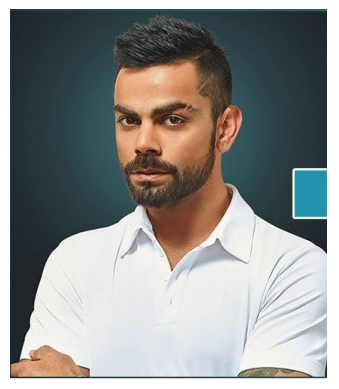

In [6]:
# Image Path
image_address = 'test.png'
# Read Image
img = cv2.imread(image_address)
# Change color scale
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

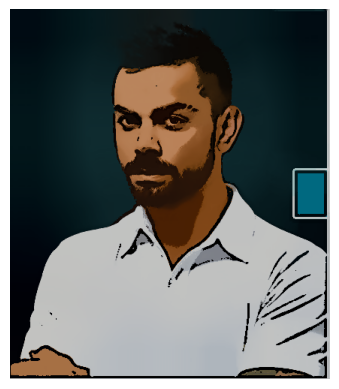

In [7]:
# Image Path
image_address = 'test.png'
# Read Image
img = cv2.imread(image_address)
# Change color scale
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
# use cartonize1 function to cartonize your Image
cartoonized = cartoonize1(img)
# Show It here
plt.axis('off')
plt.imshow(cartoonized)

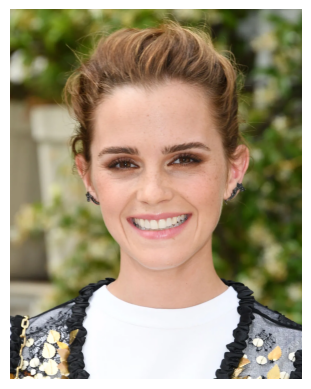

In [8]:
# Image Path
image_address = 'EW.png'
# Read Image
img = cv2.imread(image_address)
# Change color scale
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

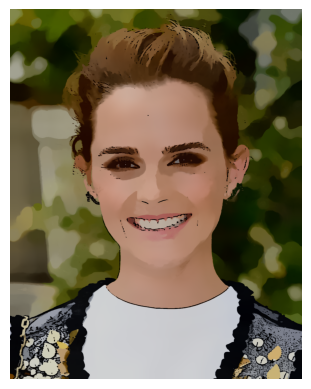

In [9]:
# Image Path
image_address = 'EW.png'
# Read Image
img = cv2.imread(image_address)
# Change color scale
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
# use cartonize1 function to cartonize your Image
cartoonized = cartoonize1(img)
# Show It here
plt.axis('off')
plt.imshow(cartoonized)

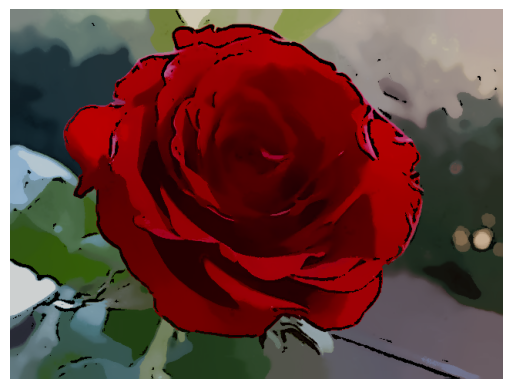

In [10]:
# Image Path
image_address = 'red-rose1.jpg'
# Read Image
img = cv2.imread(image_address)
# Change color scale
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
# use cartonize1 function to cartonize your Image
cartoonized = cartoonize1(img)
# Show It here
plt.axis('off')
plt.imshow(cartoonized)

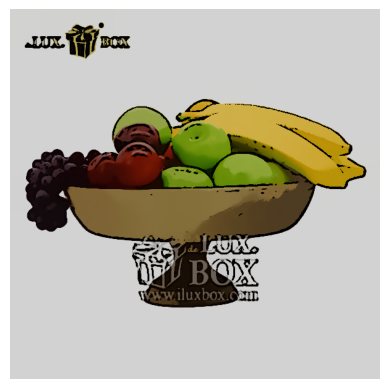

In [11]:
# Image Path
image_address = 'Fruit.jpg'
# Read Image
img = cv2.imread(image_address)
# Change color scale
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
# use cartonize1 function to cartonize your Image
cartoonized = cartoonize1(img)
# Show It here
plt.axis('off')
plt.imshow(cartoonized)